In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib as mlp
import seaborn as sns

In [24]:
# icds 2008 - 2021
version_years = pd.read_csv('/home/abel/git_repos/Projektarbeit/analysis/icd10gm_history.csv', sep=';')
version_years = version_years[(version_years['ver'] != 2007) & (version_years['verevent'] == 'I')]
sns.set_theme(style="whitegrid")

In [25]:
version_years.head()


,ver,ebene,ort,art,kapnr,grvon,code,normcode,codeohnepunkt,titel,...,sexfehlertyp,altunt,altob,altfehlertyp,exot,belegt,ifsgmeldung,ifsglabor,vermodif,verevent
23841,2008,4,N,X,1,B25,B25.8-,B25.8,B258,Sonstige Zytomegalie,...,9,9999,9999,9,N,J,N,N,2008,I
23916,2008,5,T,X,1,B25,B25.80,B25.80,B2580,Infektion des Verdauungstraktes durch Zytomega...,...,9,9999,9999,9,N,J,N,N,2008,I
23917,2008,5,T,X,1,B25,B25.88,B25.88,B2588,Sonstige Zytomegalie,...,9,9999,9999,9,N,J,N,N,2008,I
23918,2008,4,N,X,3,D70,D76.0-,D76.0,D760,"Langerhans-Zell-Histiozytose, anderenorts nich...",...,9,9999,9999,9,N,J,N,N,2008,I
23919,2008,5,T,X,3,D70,D76.00,D76.00,D7600,Multifokale Langerhans-Zell-Histiozytose,...,9,9999,9999,9,N,J,N,N,2008,I


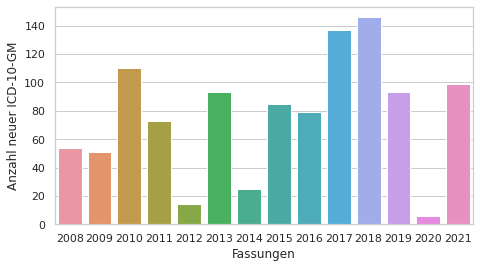

In [26]:
mlp.pyplot.figure(figsize=(7.5,4))
sns.countplot(data=version_years, x="ver")
#mlp.pyplot.title("Neue ICD-10-GM pro Jahr")
mlp.pyplot.ylabel("Anzahl neuer ICD-10-GM")
mlp.pyplot.xlabel("Fassungen")
mlp.pyplot.savefig("/home/abel/git_repos/Projektarbeit/figures/newicdyear.svg")

Text(0.5, 0, 'Fassungen')

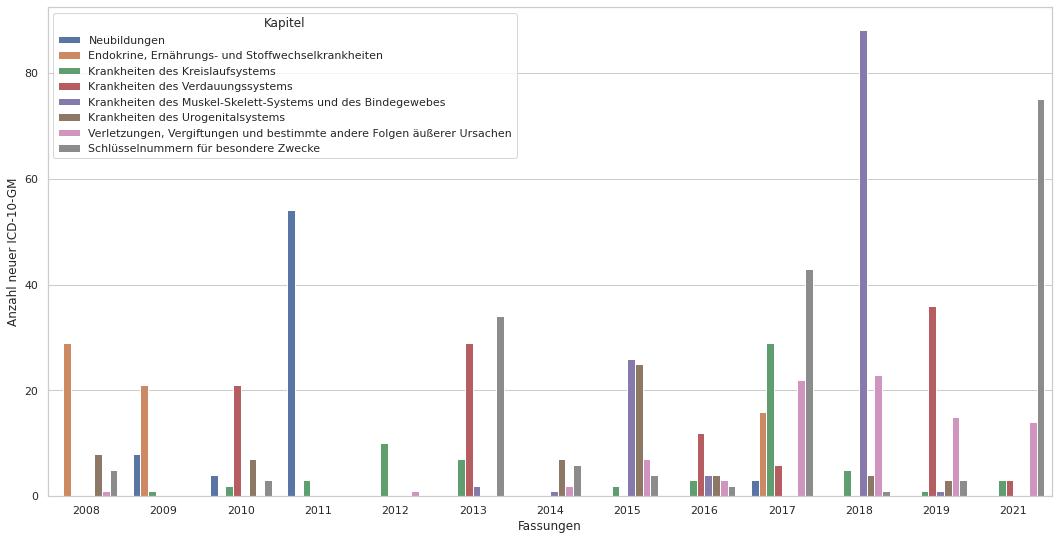

In [5]:
kapmore20 = pd.read_csv('/home/abel/git_repos/Projektarbeit/analysis/kapmore20_2008_2021.csv', sep=';')
mlp.pyplot.figure(figsize=(18,9))

sns.countplot(data=kapmore20, x="ver", hue="kapnr")
mlp.pyplot.legend(labels =["Neubildungen",
"Endokrine, Ernährungs- und Stoffwechselkrankheiten",
"Krankheiten des Kreislaufsystems",
"Krankheiten des Verdauungssystems",
"Krankheiten des Muskel-Skelett-Systems und des Bindegewebes",
"Krankheiten des Urogenitalsystems",
"Verletzungen, Vergiftungen und bestimmte andere Folgen äußerer Ursachen",
"Schlüsselnummern für besondere Zwecke"
], title = "Kapitel",  loc='upper left')
# mlp.pyplot.title("Meist repräsentierte Kapitel der neuen ICD-10-GM pro Jahr")
mlp.pyplot.ylabel("Anzahl neuer ICD-10-GM")
mlp.pyplot.xlabel("Fassungen")
#mlp.pyplot.savefig("/home/abel/git_repos/Projektarbeit/figures/kaptnrYear.svg")
#mlp.pyplot.figure(figsize=(40,20))

Text(0.5, 0, 'Fassungen')

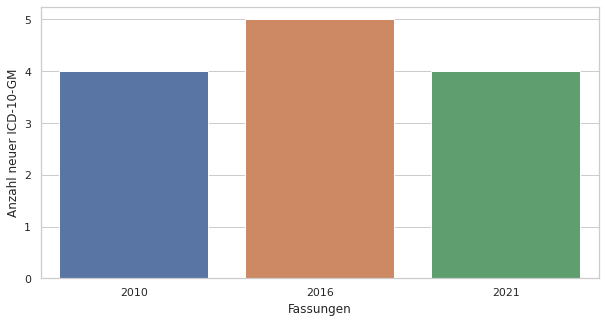

In [27]:
mlp.pyplot.figure(figsize=(10,5))
meldung = version_years[version_years['ifsgmeldung'] != 'N']


sns.countplot(data=meldung, x="ver")
#mlp.pyplot.title("Arzt-Meldepflicht pro Jahr")
mlp.pyplot.ylabel("Anzahl neuer ICD-10-GM")
mlp.pyplot.xlabel("Fassungen")

<Figure size 720x360 with 0 Axes>

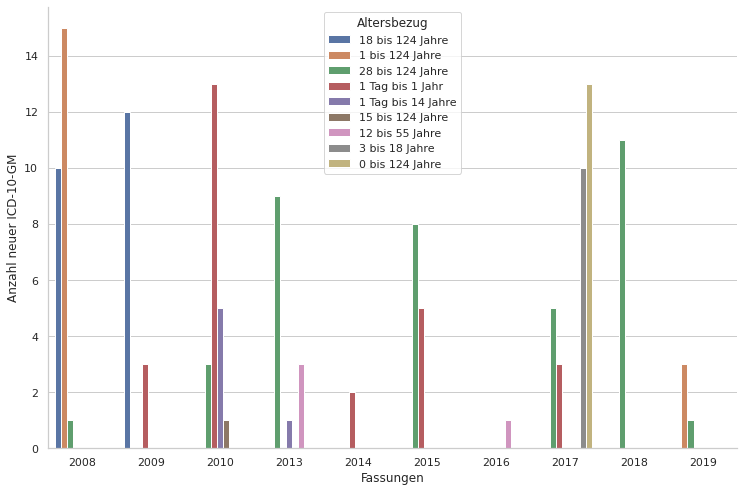

In [28]:
mlp.pyplot.figure(figsize=(10,5))
#alter = version_years 
version_years['alter'] = version_years['altunt'] + version_years['altob']
alter = version_years = version_years[version_years['alter'] != "99999999"]
sns.catplot(data=alter, x="ver", hue="alter", legend = False, kind="count", height=7, aspect=1.5)
#mlp.pyplot.title("Altersbezug")
mlp.pyplot.ylabel("Anzahl neuer ICD-10-GM")
mlp.pyplot.xlabel("Fassungen")
mlp.pyplot.legend(labels = ["18 bis 124 Jahre",
"1 bis 124 Jahre",
"28 bis 124 Jahre",
"1 Tag bis 1 Jahr",
"1 Tag bis 14 Jahre",
"15 bis 124 Jahre",
"12 bis 55 Jahre",
"3 bis 18 Jahre",
"0 bis 124 Jahre"], 
                  title = "Altersbezug", loc = 'upper center')
#mlp.pyplot.legend(bbox_to_anchor=(1.02, 0.15), loc='right', borderaxespad=0)
# mlp.pyplot.legend(labels = ["N nein", "J Ja"], title = "Altersbezug")
mlp.pyplot.savefig("/home/abel/git_repos/Projektarbeit/figures/alterYear.svg")

In [57]:
# icds 2008 - 2021
version_years = pd.read_csv('/home/abel/git_repos/Projektarbeit/analysis/icd10gm_history.csv', sep=';')
version_years = version_years[(version_years['verevent'] == 'D')]

In [9]:
version_years.head()

,ver,ebene,ort,art,kapnr,grvon,code,normcode,codeohnepunkt,titel,...,sexfehlertyp,altunt,altob,altfehlertyp,exot,belegt,ifsgmeldung,ifsglabor,vermodif,verevent
15456,2007,4,T,X,1,B25,B25.8,B25.8,B258,Sonstige Zytomegalie,...,9,9999,9999,9,N,J,N,N,2008,D
15457,2007,4,T,X,3,D70,D76.0,D76.0,D760,"Langerhans-Zell-Histiozytose, anderenorts nich...",...,9,9999,9999,9,N,J,N,N,2008,D
15458,2007,4,T,X,4,E65,E66.0,E66.0,E660,Adipositas durch übermäßige Kalorienzufuhr,...,9,t028,j124,K,N,J,N,N,2008,D
15459,2007,4,T,X,4,E65,E66.1,E66.1,E661,Arzneimittelinduzierte Adipositas,...,9,t028,j124,K,N,J,N,N,2008,D
15460,2007,4,T,X,4,E65,E66.2,E66.2,E662,Übermäßige Adipositas mit alveolärer Hypoventi...,...,9,t028,j124,K,N,J,N,N,2008,D


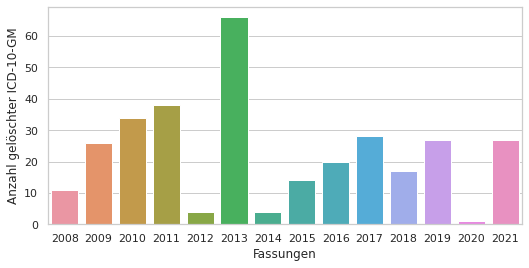

In [30]:
# deleted icd by year
mlp.pyplot.figure(figsize=(8.5,4))
sns.countplot(data=version_years, x="vermodif")
#mlp.pyplot.title("Neue ICD-10-GM pro Jahr")
mlp.pyplot.ylabel("Anzahl gelöschter ICD-10-GM")
mlp.pyplot.xlabel("Fassungen")
#mlp.pyplot.legend(title = "Alte Fassungen")
mlp.pyplot.savefig("/home/abel/git_repos/Projektarbeit/figures/neuVersionDelete.svg")

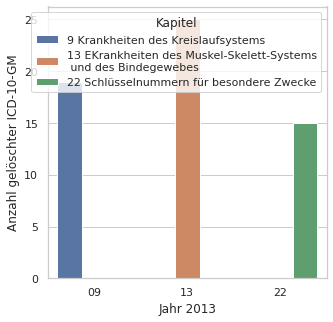

In [55]:
kapmore20 = pd.read_csv('/home/abel/git_repos/Projektarbeit/analysis/icd10gm_more_kap_delete_13.csv', sep=';', converters={'kapnr': str})
mlp.pyplot.figure(figsize=(5,5))

sns.countplot(data=kapmore20, x="kapnr", hue="kapti")
mlp.pyplot.legend(labels =["9 Krankheiten des Kreislaufsystems",
"13 EKrankheiten des Muskel-Skelett-Systems\n und des Bindegewebes",
"22 Schlüsselnummern für besondere Zwecke"
], title = "Kapitel")
# mlp.pyplot.title("Meist repräsentierte Kapitel der neuen ICD-10-GM pro Jahr")
mlp.pyplot.ylabel("Anzahl gelöschter ICD-10-GM")
mlp.pyplot.xlabel("Jahr 2013")
mlp.pyplot.savefig("/home/abel/git_repos/Projektarbeit/figures/kaptnr13.svg")
#mlp.pyplot.figure(figsize=(40,20))

Text(0.5, 0, 'Alte Fassungen')

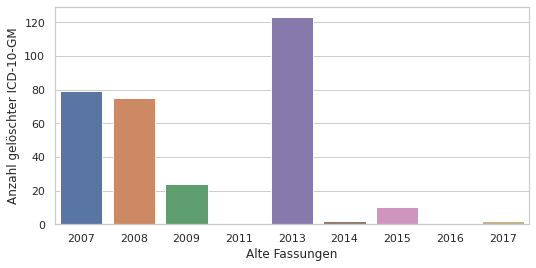

In [31]:
# deleted icd by year
#mlp.pyplot.figure(figsize=(8.5,4))
#sns.countplot(data=version_years, x="ver")
#mlp.pyplot.title("Neue ICD-10-GM pro Jahr")
#mlp.pyplot.ylabel("Anzahl gelöschter ICD-10-GM")
#mlp.pyplot.xlabel("Alte Fassungen")
#mlp.pyplot.legend(title = "Alte Fassungen")
#mlp.pyplot.savefig("/home/abel/git_repos/Projektarbeit/figures/oldVersionDelete.svg")

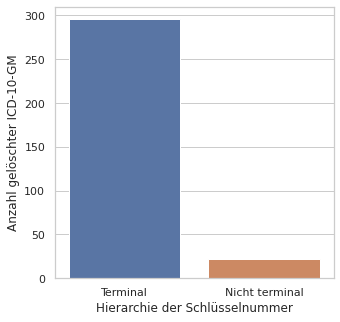

In [61]:
o = version_years
o['ort'] = o['ort'].replace(['T'], 'Terminal')
o['ort'] = o['ort'].replace(['N'], 'Nicht terminal')
mlp.pyplot.figure(figsize=(5,5))
sns.countplot(data=o, x="ort")
#mlp.pyplot.title("Terminale und nicht terminale Codes pro Jahr")
mlp.pyplot.ylabel("Anzahl gelöschter ICD-10-GM")
mlp.pyplot.xlabel("Hierarchie der Schlüsselnummer")
#mlp.pyplot.legend(labels=["Nicht terminale Codes", "Terminale Codes"])
mlp.pyplot.savefig("/home/abel/git_repos/Projektarbeit/figures/ortoldYear.svg")

In [33]:
# icds 2008 - 2021
version_years = pd.read_csv('/home/abel/git_repos/Projektarbeit/analysis/icd10gm_history.csv', sep=';')
version_years = version_years[(version_years['verevent'] == 'U')]
#version_years = version_years[(version_years['vermodif'] != 2008)]

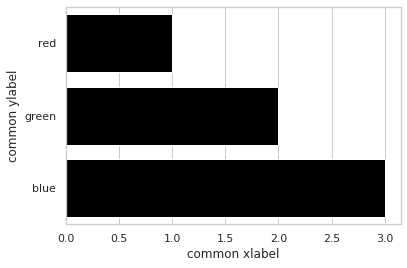

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fake = pd.DataFrame({'cat': ['red', 'green', 'blue'], 'val': [1, 2, 3]})
ax = sns.barplot(x = 'val', y = 'cat', 
              data = fake, 
              color = 'black')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

In [35]:
#mlp.pyplot.figure(figsize=(7.5,10))
#sns.countplot(data=version_years, x="vermodif")
#mlp.pyplot.title("Neue ICD-10-GM pro Jahr")
#mlp.pyplot.ylabel("Anzahl geänderten ICD-10-GM")
#mlp.pyplot.xlabel("Fassungen")
#mlp.pyplot.savefig("/home/abel/git_repos/Projektarbeit/figures/updicdyear.svg")